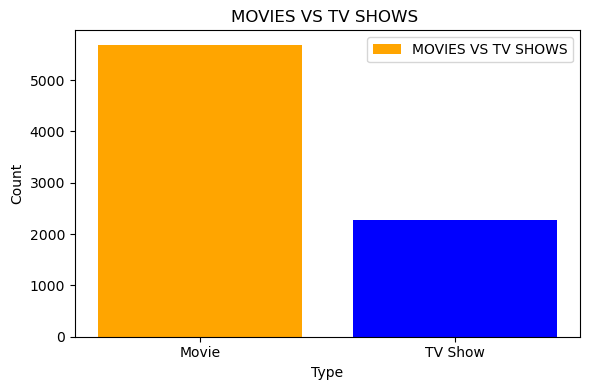

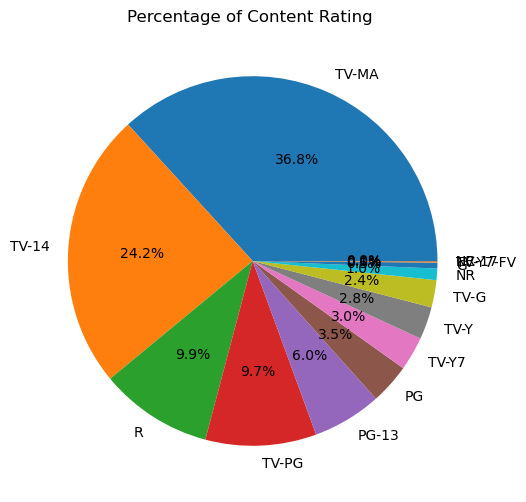

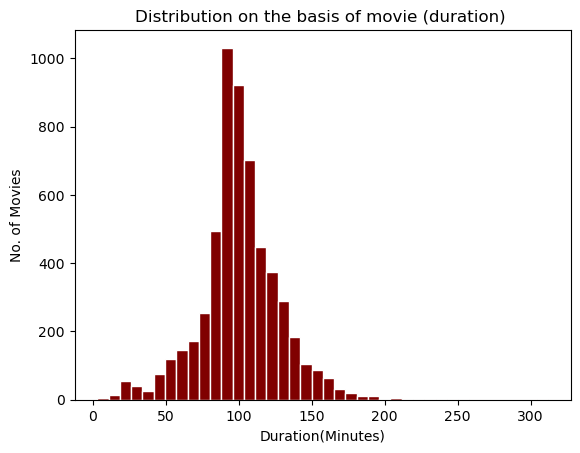

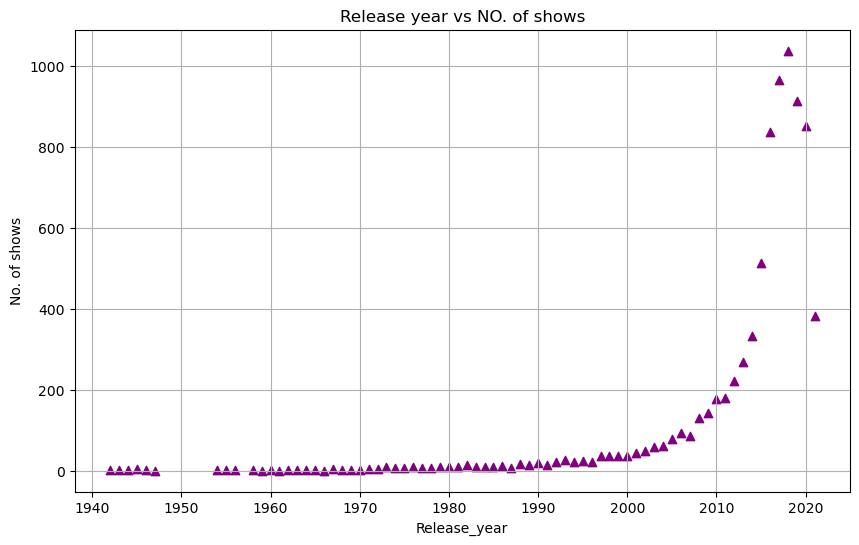

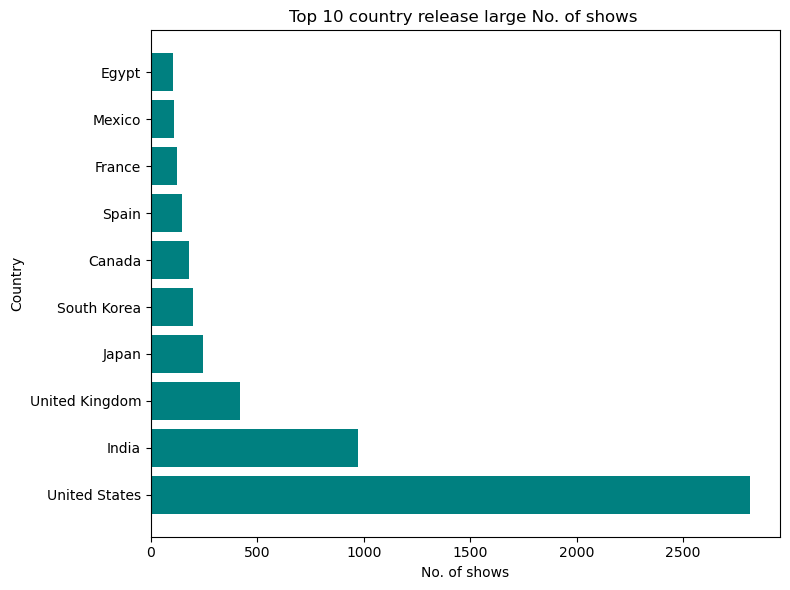

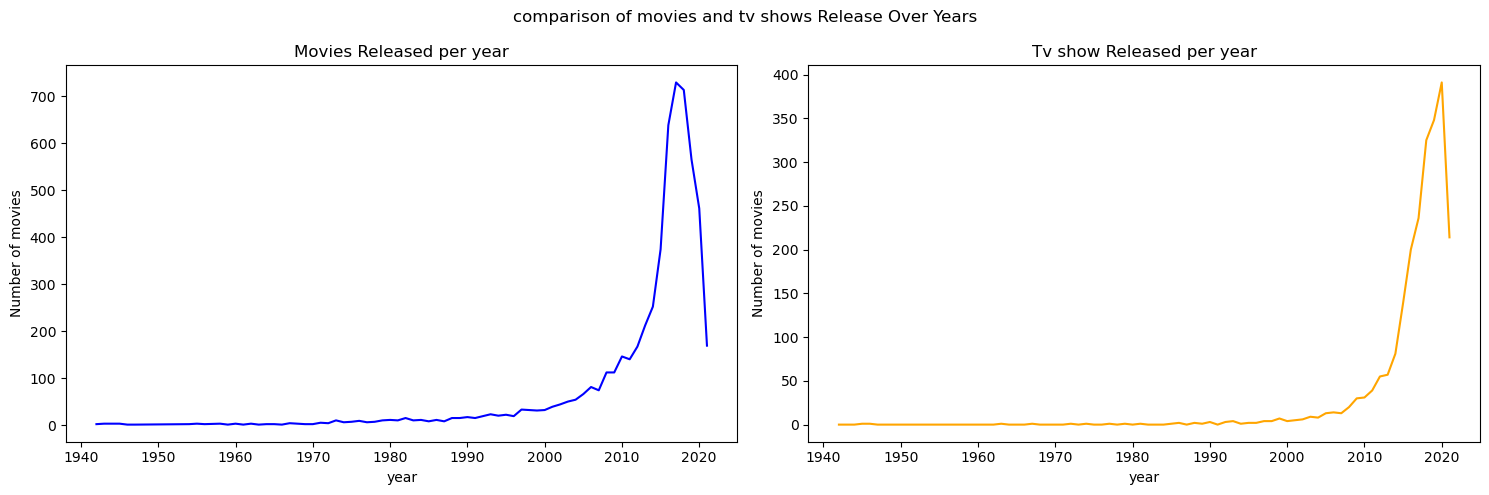

In [19]:
# import lib.
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df=pd.read_csv('netflix_titles.csv')

# clear data
df = df.dropna(subset=['type', 'release_year', 'rating', 'duration', 'country'])

count=df['type'].value_counts()   # this value_counts() method count the no. of moveis and shows
plt.figure(figsize=(6,4))
plt.bar(count.index,count.values,color=['orange','blue'],label='MOVIES VS TV SHOWS')
plt.title('MOVIES VS TV SHOWS ')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()
plt.savefig('MOVIES_VS_TV_SHOWS.png')
plt.show()

#  create a pie chart rating count 

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(rating_counts.values,labels=rating_counts.index,autopct='%1.1f%%')
plt.title('Percentage of Content Rating ')
plt.savefig('Rating.png')
plt.show()


movies_df=df[df['type']=="Movie"].copy()
movies_df['duration_time']=movies_df['duration'].str.replace(' min',"").astype(int)
plt.hist(movies_df['duration_time'],bins=40,color='#800000',edgecolor='w',label="Movies-time")
plt.xlabel('Duration(Minutes)')
plt.ylabel('No. of Movies')
plt.title('Distribution on the basis of movie (duration) ')
plt.savefig('movie(duration)-histogram.png')
plt.show()


release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,marker="^",label="year vs shows", color='purple')
plt.xlabel('Release_year')
plt.ylabel('No. of shows')
plt.title('Release year vs NO. of shows')
plt.savefig('Release_year_vs_NO._of_shows.png')
plt.grid()
plt.show()


country_count=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color="teal")
plt.xlabel('No. of shows')
plt.ylabel('Country')
plt.title('Top 10 country release large No. of shows ')
plt.tight_layout()

plt.savefig('Top 10 country.png')
plt.show()


content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig , ax= plt.subplots(1,2,figsize=(15,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of movies')

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('Tv show Released per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('Number of movies')

fig.suptitle('comparison of movies and tv shows Release Over Years')
plt.tight_layout()
plt.savefig('moveis_tv_Shows_coparison.png')
plt.show()